# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

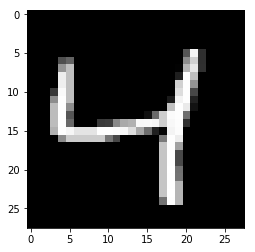

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
print(mnist.train._images.shape)
print(mnist.train._labels.shape)

(60000, 784)
(60000,)


In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 784], name='inputs')
targets_ = tf.placeholder(tf.float32, shape=[None, 784], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu, name='encoded')

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, name='logits')
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='decoded') 

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_sum(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [18]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples // batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 108903.1953
Epoch: 1/20... Training loss: 108237.2031
Epoch: 1/20... Training loss: 107604.1328
Epoch: 1/20... Training loss: 106916.7109
Epoch: 1/20... Training loss: 106143.5000
Epoch: 1/20... Training loss: 105081.8438
Epoch: 1/20... Training loss: 103935.5703
Epoch: 1/20... Training loss: 102583.0859
Epoch: 1/20... Training loss: 100900.3203
Epoch: 1/20... Training loss: 99413.6328
Epoch: 1/20... Training loss: 97385.8750
Epoch: 1/20... Training loss: 94966.3516
Epoch: 1/20... Training loss: 92651.6953
Epoch: 1/20... Training loss: 90189.1094
Epoch: 1/20... Training loss: 87591.2656
Epoch: 1/20... Training loss: 84842.1406
Epoch: 1/20... Training loss: 82173.1016
Epoch: 1/20... Training loss: 79757.8750
Epoch: 1/20... Training loss: 76474.8438
Epoch: 1/20... Training loss: 73496.4141
Epoch: 1/20... Training loss: 70898.4141
Epoch: 1/20... Training loss: 68531.1719
Epoch: 1/20... Training loss: 65932.9844
Epoch: 1/20... Training loss: 63303.3516
Epoch: 

Epoch: 1/20... Training loss: 29995.4492
Epoch: 1/20... Training loss: 29104.4609
Epoch: 1/20... Training loss: 30240.7852
Epoch: 1/20... Training loss: 28975.2188
Epoch: 1/20... Training loss: 29884.5430
Epoch: 1/20... Training loss: 30526.5215
Epoch: 1/20... Training loss: 30286.3125
Epoch: 1/20... Training loss: 29522.7930
Epoch: 1/20... Training loss: 30008.3027
Epoch: 1/20... Training loss: 28360.3203
Epoch: 1/20... Training loss: 29896.9883
Epoch: 1/20... Training loss: 29604.1328
Epoch: 1/20... Training loss: 30515.3594
Epoch: 1/20... Training loss: 28951.8672
Epoch: 1/20... Training loss: 29389.6562
Epoch: 1/20... Training loss: 28962.2852
Epoch: 1/20... Training loss: 29754.8301
Epoch: 1/20... Training loss: 29727.0469
Epoch: 1/20... Training loss: 29584.4746
Epoch: 1/20... Training loss: 29371.4062
Epoch: 1/20... Training loss: 29719.5977
Epoch: 1/20... Training loss: 28730.6992
Epoch: 1/20... Training loss: 29002.7578
Epoch: 1/20... Training loss: 29595.2188
Epoch: 1/20... T

Epoch: 2/20... Training loss: 23971.1992
Epoch: 2/20... Training loss: 24627.7734
Epoch: 2/20... Training loss: 24743.2852
Epoch: 2/20... Training loss: 23799.1230
Epoch: 2/20... Training loss: 24505.8398
Epoch: 2/20... Training loss: 23293.8340
Epoch: 2/20... Training loss: 24967.6211
Epoch: 2/20... Training loss: 24432.4961
Epoch: 2/20... Training loss: 24325.9863
Epoch: 2/20... Training loss: 24219.2246
Epoch: 2/20... Training loss: 25096.7051
Epoch: 2/20... Training loss: 24793.0273
Epoch: 2/20... Training loss: 23077.9609
Epoch: 2/20... Training loss: 24207.3945
Epoch: 2/20... Training loss: 24563.1484
Epoch: 2/20... Training loss: 24801.1719
Epoch: 2/20... Training loss: 24004.1055
Epoch: 2/20... Training loss: 23871.3496
Epoch: 2/20... Training loss: 24050.4863
Epoch: 2/20... Training loss: 24304.7578
Epoch: 2/20... Training loss: 23625.8047
Epoch: 2/20... Training loss: 24893.4297
Epoch: 2/20... Training loss: 24204.5156
Epoch: 2/20... Training loss: 23537.7559
Epoch: 2/20... T

Epoch: 3/20... Training loss: 21531.4434
Epoch: 3/20... Training loss: 22405.4434
Epoch: 3/20... Training loss: 21842.2129
Epoch: 3/20... Training loss: 21374.8301
Epoch: 3/20... Training loss: 22086.8965
Epoch: 3/20... Training loss: 20830.0898
Epoch: 3/20... Training loss: 21108.2969
Epoch: 3/20... Training loss: 21450.4629
Epoch: 3/20... Training loss: 21243.6094
Epoch: 3/20... Training loss: 21232.1504
Epoch: 3/20... Training loss: 22466.6504
Epoch: 3/20... Training loss: 21253.5156
Epoch: 3/20... Training loss: 22167.6191
Epoch: 3/20... Training loss: 21726.2383
Epoch: 3/20... Training loss: 21416.5078
Epoch: 3/20... Training loss: 21434.2871
Epoch: 3/20... Training loss: 21363.4648
Epoch: 3/20... Training loss: 22328.7109
Epoch: 3/20... Training loss: 20784.5273
Epoch: 3/20... Training loss: 21663.6172
Epoch: 3/20... Training loss: 21601.1367
Epoch: 3/20... Training loss: 21742.8379
Epoch: 3/20... Training loss: 20826.1895
Epoch: 3/20... Training loss: 21647.8418
Epoch: 3/20... T

Epoch: 4/20... Training loss: 19323.9805
Epoch: 4/20... Training loss: 19663.0781
Epoch: 4/20... Training loss: 19678.0625
Epoch: 4/20... Training loss: 18981.0645
Epoch: 4/20... Training loss: 19052.8770
Epoch: 4/20... Training loss: 18899.5957
Epoch: 4/20... Training loss: 19429.5410
Epoch: 4/20... Training loss: 18559.1602
Epoch: 4/20... Training loss: 18566.7578
Epoch: 4/20... Training loss: 20068.4883
Epoch: 4/20... Training loss: 19766.1367
Epoch: 4/20... Training loss: 19826.9453
Epoch: 4/20... Training loss: 20034.7031
Epoch: 4/20... Training loss: 19891.5918
Epoch: 4/20... Training loss: 19064.9805
Epoch: 4/20... Training loss: 19751.7285
Epoch: 4/20... Training loss: 18982.8125
Epoch: 4/20... Training loss: 19795.8965
Epoch: 4/20... Training loss: 19639.2500
Epoch: 4/20... Training loss: 19518.9844
Epoch: 4/20... Training loss: 19346.7578
Epoch: 4/20... Training loss: 20550.9922
Epoch: 4/20... Training loss: 18958.5273
Epoch: 4/20... Training loss: 18731.7500
Epoch: 4/20... T

Epoch: 4/20... Training loss: 17843.9785
Epoch: 4/20... Training loss: 17780.3262
Epoch: 4/20... Training loss: 17694.4570
Epoch: 5/20... Training loss: 18292.0137
Epoch: 5/20... Training loss: 18065.1172
Epoch: 5/20... Training loss: 17858.0977
Epoch: 5/20... Training loss: 18190.1094
Epoch: 5/20... Training loss: 18590.2578
Epoch: 5/20... Training loss: 19027.1367
Epoch: 5/20... Training loss: 17802.0391
Epoch: 5/20... Training loss: 19087.8906
Epoch: 5/20... Training loss: 17882.8203
Epoch: 5/20... Training loss: 18112.3555
Epoch: 5/20... Training loss: 17780.0625
Epoch: 5/20... Training loss: 17823.4570
Epoch: 5/20... Training loss: 17639.8711
Epoch: 5/20... Training loss: 17451.0020
Epoch: 5/20... Training loss: 18294.6934
Epoch: 5/20... Training loss: 17683.8496
Epoch: 5/20... Training loss: 17938.5312
Epoch: 5/20... Training loss: 17622.9414
Epoch: 5/20... Training loss: 17736.2227
Epoch: 5/20... Training loss: 18079.3281
Epoch: 5/20... Training loss: 18167.6797
Epoch: 5/20... T

Epoch: 5/20... Training loss: 17212.6992
Epoch: 5/20... Training loss: 17050.7656
Epoch: 5/20... Training loss: 17365.1172
Epoch: 5/20... Training loss: 17745.9141
Epoch: 5/20... Training loss: 17125.5508
Epoch: 5/20... Training loss: 16814.9062
Epoch: 5/20... Training loss: 17276.1895
Epoch: 5/20... Training loss: 16762.4082
Epoch: 5/20... Training loss: 16655.4043
Epoch: 5/20... Training loss: 17881.5527
Epoch: 5/20... Training loss: 17113.2852
Epoch: 5/20... Training loss: 17610.8086
Epoch: 5/20... Training loss: 17073.4941
Epoch: 5/20... Training loss: 17525.7598
Epoch: 5/20... Training loss: 17129.5078
Epoch: 5/20... Training loss: 17203.6875
Epoch: 5/20... Training loss: 17869.1426
Epoch: 5/20... Training loss: 17900.5762
Epoch: 5/20... Training loss: 16299.9648
Epoch: 5/20... Training loss: 16840.7949
Epoch: 5/20... Training loss: 17301.6016
Epoch: 5/20... Training loss: 17680.3418
Epoch: 5/20... Training loss: 16356.3320
Epoch: 5/20... Training loss: 17139.2832
Epoch: 5/20... T

Epoch: 6/20... Training loss: 17232.0430
Epoch: 6/20... Training loss: 16329.2754
Epoch: 6/20... Training loss: 16283.0312
Epoch: 6/20... Training loss: 16284.8379
Epoch: 6/20... Training loss: 16963.5879
Epoch: 6/20... Training loss: 15863.9600
Epoch: 6/20... Training loss: 15875.4082
Epoch: 6/20... Training loss: 17071.7598
Epoch: 6/20... Training loss: 16816.5234
Epoch: 6/20... Training loss: 16232.7295
Epoch: 6/20... Training loss: 15852.1934
Epoch: 6/20... Training loss: 16841.2070
Epoch: 6/20... Training loss: 16394.0273
Epoch: 6/20... Training loss: 16090.8770
Epoch: 6/20... Training loss: 16520.9668
Epoch: 6/20... Training loss: 16155.9941
Epoch: 6/20... Training loss: 16027.7715
Epoch: 6/20... Training loss: 16186.7930
Epoch: 6/20... Training loss: 16097.1953
Epoch: 6/20... Training loss: 16476.5547
Epoch: 6/20... Training loss: 16631.5625
Epoch: 6/20... Training loss: 15778.6055
Epoch: 6/20... Training loss: 15653.3066
Epoch: 6/20... Training loss: 16926.4941
Epoch: 6/20... T

Epoch: 7/20... Training loss: 16163.0137
Epoch: 7/20... Training loss: 16512.5039
Epoch: 7/20... Training loss: 15929.4170
Epoch: 7/20... Training loss: 16294.5430
Epoch: 7/20... Training loss: 15786.7695
Epoch: 7/20... Training loss: 16136.1719
Epoch: 7/20... Training loss: 15687.3682
Epoch: 7/20... Training loss: 15636.1055
Epoch: 7/20... Training loss: 16149.3955
Epoch: 7/20... Training loss: 15967.8623
Epoch: 7/20... Training loss: 16177.5137
Epoch: 7/20... Training loss: 16054.4160
Epoch: 7/20... Training loss: 16608.0137
Epoch: 7/20... Training loss: 15719.0215
Epoch: 7/20... Training loss: 15916.0605
Epoch: 7/20... Training loss: 16034.0684
Epoch: 7/20... Training loss: 15148.3555
Epoch: 7/20... Training loss: 15521.4316
Epoch: 7/20... Training loss: 15529.1562
Epoch: 7/20... Training loss: 16150.4316
Epoch: 7/20... Training loss: 15865.2236
Epoch: 7/20... Training loss: 15536.5225
Epoch: 7/20... Training loss: 15701.0938
Epoch: 7/20... Training loss: 15744.9893
Epoch: 7/20... T

Epoch: 8/20... Training loss: 15907.3047
Epoch: 8/20... Training loss: 15862.0879
Epoch: 8/20... Training loss: 15371.3242
Epoch: 8/20... Training loss: 15414.3076
Epoch: 8/20... Training loss: 16279.1582
Epoch: 8/20... Training loss: 15355.2422
Epoch: 8/20... Training loss: 14902.0605
Epoch: 8/20... Training loss: 15129.6689
Epoch: 8/20... Training loss: 15608.5918
Epoch: 8/20... Training loss: 15404.1572
Epoch: 8/20... Training loss: 15805.0791
Epoch: 8/20... Training loss: 16169.9277
Epoch: 8/20... Training loss: 15963.9248
Epoch: 8/20... Training loss: 15456.6953
Epoch: 8/20... Training loss: 15709.2285
Epoch: 8/20... Training loss: 15679.9951
Epoch: 8/20... Training loss: 15171.6035
Epoch: 8/20... Training loss: 15710.2891
Epoch: 8/20... Training loss: 15682.9023
Epoch: 8/20... Training loss: 15415.7402
Epoch: 8/20... Training loss: 15337.7578
Epoch: 8/20... Training loss: 15499.4824
Epoch: 8/20... Training loss: 15207.3486
Epoch: 8/20... Training loss: 15292.6719
Epoch: 8/20... T

Epoch: 8/20... Training loss: 15255.8340
Epoch: 8/20... Training loss: 15319.6992
Epoch: 8/20... Training loss: 14843.5156
Epoch: 9/20... Training loss: 15760.3066
Epoch: 9/20... Training loss: 15118.5146
Epoch: 9/20... Training loss: 14794.4521
Epoch: 9/20... Training loss: 15387.6709
Epoch: 9/20... Training loss: 15519.3291
Epoch: 9/20... Training loss: 15360.2383
Epoch: 9/20... Training loss: 15864.9258
Epoch: 9/20... Training loss: 15458.9531
Epoch: 9/20... Training loss: 14998.1035
Epoch: 9/20... Training loss: 15585.4082
Epoch: 9/20... Training loss: 15315.8867
Epoch: 9/20... Training loss: 15339.2324
Epoch: 9/20... Training loss: 15411.1113
Epoch: 9/20... Training loss: 15465.7295
Epoch: 9/20... Training loss: 15043.1338
Epoch: 9/20... Training loss: 15974.1211
Epoch: 9/20... Training loss: 15547.6748
Epoch: 9/20... Training loss: 14763.0771
Epoch: 9/20... Training loss: 15258.5293
Epoch: 9/20... Training loss: 14931.1465
Epoch: 9/20... Training loss: 15792.7441
Epoch: 9/20... T

Epoch: 9/20... Training loss: 14470.5811
Epoch: 9/20... Training loss: 14809.8604
Epoch: 9/20... Training loss: 15444.9395
Epoch: 9/20... Training loss: 14835.8984
Epoch: 9/20... Training loss: 14780.6338
Epoch: 9/20... Training loss: 14756.4512
Epoch: 9/20... Training loss: 14553.5664
Epoch: 9/20... Training loss: 15252.4834
Epoch: 9/20... Training loss: 15759.0361
Epoch: 9/20... Training loss: 15540.3486
Epoch: 9/20... Training loss: 14536.3086
Epoch: 9/20... Training loss: 15176.5645
Epoch: 9/20... Training loss: 14638.0752
Epoch: 9/20... Training loss: 15005.0361
Epoch: 9/20... Training loss: 15095.3359
Epoch: 9/20... Training loss: 15218.6650
Epoch: 9/20... Training loss: 14995.0957
Epoch: 9/20... Training loss: 14933.1240
Epoch: 9/20... Training loss: 14850.6465
Epoch: 9/20... Training loss: 15703.7383
Epoch: 9/20... Training loss: 14843.4424
Epoch: 9/20... Training loss: 15226.4766
Epoch: 9/20... Training loss: 15149.5684
Epoch: 9/20... Training loss: 15147.4189
Epoch: 9/20... T

Epoch: 10/20... Training loss: 14963.7305
Epoch: 10/20... Training loss: 14297.8936
Epoch: 10/20... Training loss: 14671.7490
Epoch: 10/20... Training loss: 14581.5527
Epoch: 10/20... Training loss: 14975.4795
Epoch: 10/20... Training loss: 15099.4844
Epoch: 10/20... Training loss: 14759.5645
Epoch: 10/20... Training loss: 14524.5391
Epoch: 10/20... Training loss: 14546.5723
Epoch: 10/20... Training loss: 14634.9707
Epoch: 10/20... Training loss: 15021.0303
Epoch: 10/20... Training loss: 14996.2090
Epoch: 10/20... Training loss: 15507.2080
Epoch: 10/20... Training loss: 15598.2812
Epoch: 10/20... Training loss: 14850.6426
Epoch: 10/20... Training loss: 15592.7227
Epoch: 10/20... Training loss: 15193.0938
Epoch: 10/20... Training loss: 14940.2490
Epoch: 10/20... Training loss: 14722.1836
Epoch: 10/20... Training loss: 14693.7568
Epoch: 10/20... Training loss: 14779.8271
Epoch: 10/20... Training loss: 14427.7266
Epoch: 10/20... Training loss: 15070.9219
Epoch: 10/20... Training loss: 151

Epoch: 11/20... Training loss: 14920.1543
Epoch: 11/20... Training loss: 14620.2656
Epoch: 11/20... Training loss: 15049.3604
Epoch: 11/20... Training loss: 14495.9629
Epoch: 11/20... Training loss: 14815.3008
Epoch: 11/20... Training loss: 15307.9453
Epoch: 11/20... Training loss: 15169.1504
Epoch: 11/20... Training loss: 14413.4189
Epoch: 11/20... Training loss: 15033.8086
Epoch: 11/20... Training loss: 14859.7402
Epoch: 11/20... Training loss: 15188.6934
Epoch: 11/20... Training loss: 14461.4941
Epoch: 11/20... Training loss: 14948.7500
Epoch: 11/20... Training loss: 14929.9766
Epoch: 11/20... Training loss: 15577.3740
Epoch: 11/20... Training loss: 14733.9951
Epoch: 11/20... Training loss: 14573.2051
Epoch: 11/20... Training loss: 14541.3867
Epoch: 11/20... Training loss: 14276.1396
Epoch: 11/20... Training loss: 14655.3408
Epoch: 11/20... Training loss: 14137.2930
Epoch: 11/20... Training loss: 15110.8096
Epoch: 11/20... Training loss: 14607.5195
Epoch: 11/20... Training loss: 151

Epoch: 12/20... Training loss: 15154.9639
Epoch: 12/20... Training loss: 15221.4863
Epoch: 12/20... Training loss: 14708.2783
Epoch: 12/20... Training loss: 14882.6055
Epoch: 12/20... Training loss: 15531.9941
Epoch: 12/20... Training loss: 14821.8125
Epoch: 12/20... Training loss: 15117.6367
Epoch: 12/20... Training loss: 15673.6709
Epoch: 12/20... Training loss: 15130.8525
Epoch: 12/20... Training loss: 14573.2891
Epoch: 12/20... Training loss: 14674.8662
Epoch: 12/20... Training loss: 15480.9531
Epoch: 12/20... Training loss: 15367.5391
Epoch: 12/20... Training loss: 15277.7080
Epoch: 12/20... Training loss: 14660.4102
Epoch: 12/20... Training loss: 14990.9238
Epoch: 12/20... Training loss: 14777.4727
Epoch: 12/20... Training loss: 14590.4854
Epoch: 12/20... Training loss: 15105.9980
Epoch: 12/20... Training loss: 14370.9590
Epoch: 12/20... Training loss: 14737.0342
Epoch: 12/20... Training loss: 15202.8740
Epoch: 12/20... Training loss: 14997.1602
Epoch: 12/20... Training loss: 148

Epoch: 12/20... Training loss: 15064.4854
Epoch: 12/20... Training loss: 15283.5762
Epoch: 12/20... Training loss: 14130.4697
Epoch: 13/20... Training loss: 14369.7383
Epoch: 13/20... Training loss: 15054.3340
Epoch: 13/20... Training loss: 14704.1797
Epoch: 13/20... Training loss: 14689.5723
Epoch: 13/20... Training loss: 14706.9375
Epoch: 13/20... Training loss: 14546.6426
Epoch: 13/20... Training loss: 15286.9668
Epoch: 13/20... Training loss: 14795.9980
Epoch: 13/20... Training loss: 14541.0322
Epoch: 13/20... Training loss: 14473.1680
Epoch: 13/20... Training loss: 15140.3525
Epoch: 13/20... Training loss: 15171.1875
Epoch: 13/20... Training loss: 14729.7363
Epoch: 13/20... Training loss: 15004.1660
Epoch: 13/20... Training loss: 14855.6953
Epoch: 13/20... Training loss: 14504.3301
Epoch: 13/20... Training loss: 14882.3184
Epoch: 13/20... Training loss: 14592.9561
Epoch: 13/20... Training loss: 15148.0244
Epoch: 13/20... Training loss: 14474.8330
Epoch: 13/20... Training loss: 151

Epoch: 13/20... Training loss: 14659.7441
Epoch: 13/20... Training loss: 15003.8926
Epoch: 13/20... Training loss: 14550.5098
Epoch: 13/20... Training loss: 14298.8389
Epoch: 13/20... Training loss: 14616.7998
Epoch: 13/20... Training loss: 14639.7734
Epoch: 13/20... Training loss: 15200.4648
Epoch: 13/20... Training loss: 14914.4033
Epoch: 13/20... Training loss: 14668.3086
Epoch: 13/20... Training loss: 14623.4199
Epoch: 13/20... Training loss: 14975.1162
Epoch: 13/20... Training loss: 14960.3672
Epoch: 13/20... Training loss: 15055.1680
Epoch: 13/20... Training loss: 14418.8838
Epoch: 13/20... Training loss: 14988.3018
Epoch: 13/20... Training loss: 14675.8701
Epoch: 13/20... Training loss: 15097.7363
Epoch: 13/20... Training loss: 15011.1221
Epoch: 13/20... Training loss: 14658.3311
Epoch: 13/20... Training loss: 14733.7646
Epoch: 13/20... Training loss: 14951.0234
Epoch: 13/20... Training loss: 14905.4590
Epoch: 13/20... Training loss: 14762.9023
Epoch: 13/20... Training loss: 144

Epoch: 14/20... Training loss: 15136.8252
Epoch: 14/20... Training loss: 15113.4355
Epoch: 14/20... Training loss: 15014.4922
Epoch: 14/20... Training loss: 14356.8223
Epoch: 14/20... Training loss: 14663.0527
Epoch: 14/20... Training loss: 14802.0107
Epoch: 14/20... Training loss: 14870.3271
Epoch: 14/20... Training loss: 14856.3184
Epoch: 14/20... Training loss: 15033.2559
Epoch: 14/20... Training loss: 14534.0889
Epoch: 14/20... Training loss: 14753.5488
Epoch: 14/20... Training loss: 14942.3965
Epoch: 14/20... Training loss: 14504.1826
Epoch: 14/20... Training loss: 14517.3799
Epoch: 14/20... Training loss: 15066.8672
Epoch: 14/20... Training loss: 14270.5381
Epoch: 14/20... Training loss: 14930.1973
Epoch: 14/20... Training loss: 14980.1738
Epoch: 14/20... Training loss: 15077.8574
Epoch: 14/20... Training loss: 14939.5391
Epoch: 14/20... Training loss: 14718.3984
Epoch: 14/20... Training loss: 14454.6406
Epoch: 14/20... Training loss: 15101.8955
Epoch: 14/20... Training loss: 146

Epoch: 15/20... Training loss: 14750.7461
Epoch: 15/20... Training loss: 14526.0098
Epoch: 15/20... Training loss: 14687.9414
Epoch: 15/20... Training loss: 14574.3145
Epoch: 15/20... Training loss: 14531.7441
Epoch: 15/20... Training loss: 14768.2393
Epoch: 15/20... Training loss: 15190.5420
Epoch: 15/20... Training loss: 14608.9980
Epoch: 15/20... Training loss: 14985.6826
Epoch: 15/20... Training loss: 14735.3594
Epoch: 15/20... Training loss: 14894.7871
Epoch: 15/20... Training loss: 14529.1357
Epoch: 15/20... Training loss: 14736.6621
Epoch: 15/20... Training loss: 14964.3057
Epoch: 15/20... Training loss: 14735.9902
Epoch: 15/20... Training loss: 14739.6582
Epoch: 15/20... Training loss: 14117.0400
Epoch: 15/20... Training loss: 14882.5078
Epoch: 15/20... Training loss: 15139.6221
Epoch: 15/20... Training loss: 14688.5215
Epoch: 15/20... Training loss: 14067.7578
Epoch: 15/20... Training loss: 14613.6436
Epoch: 15/20... Training loss: 14611.9072
Epoch: 15/20... Training loss: 141

Epoch: 16/20... Training loss: 14514.3643
Epoch: 16/20... Training loss: 14430.4209
Epoch: 16/20... Training loss: 15291.8750
Epoch: 16/20... Training loss: 15044.1367
Epoch: 16/20... Training loss: 14712.1016
Epoch: 16/20... Training loss: 14750.1357
Epoch: 16/20... Training loss: 14585.0479
Epoch: 16/20... Training loss: 14684.6562
Epoch: 16/20... Training loss: 14719.9678
Epoch: 16/20... Training loss: 15200.5586
Epoch: 16/20... Training loss: 14310.1875
Epoch: 16/20... Training loss: 14313.3789
Epoch: 16/20... Training loss: 14591.8242
Epoch: 16/20... Training loss: 14186.1797
Epoch: 16/20... Training loss: 14624.6895
Epoch: 16/20... Training loss: 14573.3975
Epoch: 16/20... Training loss: 14856.5488
Epoch: 16/20... Training loss: 14734.7344
Epoch: 16/20... Training loss: 14899.5869
Epoch: 16/20... Training loss: 14381.7998
Epoch: 16/20... Training loss: 14746.6006
Epoch: 16/20... Training loss: 14198.8730
Epoch: 16/20... Training loss: 14718.4756
Epoch: 16/20... Training loss: 145

Epoch: 16/20... Training loss: 14664.4717
Epoch: 16/20... Training loss: 14708.0293
Epoch: 16/20... Training loss: 14926.5625
Epoch: 17/20... Training loss: 14297.3965
Epoch: 17/20... Training loss: 14659.8750
Epoch: 17/20... Training loss: 14531.2646
Epoch: 17/20... Training loss: 14927.2334
Epoch: 17/20... Training loss: 14908.6211
Epoch: 17/20... Training loss: 14695.6455
Epoch: 17/20... Training loss: 14837.7988
Epoch: 17/20... Training loss: 14334.2236
Epoch: 17/20... Training loss: 14384.1934
Epoch: 17/20... Training loss: 14933.1143
Epoch: 17/20... Training loss: 14730.0000
Epoch: 17/20... Training loss: 14849.4551
Epoch: 17/20... Training loss: 14691.5020
Epoch: 17/20... Training loss: 14390.2080
Epoch: 17/20... Training loss: 14467.0391
Epoch: 17/20... Training loss: 14844.6895
Epoch: 17/20... Training loss: 14792.4727
Epoch: 17/20... Training loss: 14271.4863
Epoch: 17/20... Training loss: 14857.6816
Epoch: 17/20... Training loss: 14640.6719
Epoch: 17/20... Training loss: 146

Epoch: 17/20... Training loss: 14595.7734
Epoch: 17/20... Training loss: 14398.0254
Epoch: 17/20... Training loss: 14788.6631
Epoch: 17/20... Training loss: 14585.6260
Epoch: 17/20... Training loss: 14774.2520
Epoch: 17/20... Training loss: 14137.2676
Epoch: 17/20... Training loss: 15006.6289
Epoch: 17/20... Training loss: 15249.3750
Epoch: 17/20... Training loss: 14908.4102
Epoch: 17/20... Training loss: 14498.8408
Epoch: 17/20... Training loss: 14596.5518
Epoch: 17/20... Training loss: 14829.0938
Epoch: 17/20... Training loss: 14395.1094
Epoch: 17/20... Training loss: 14616.1729
Epoch: 17/20... Training loss: 14769.0156
Epoch: 17/20... Training loss: 15402.9355
Epoch: 17/20... Training loss: 15297.8203
Epoch: 17/20... Training loss: 14211.4883
Epoch: 17/20... Training loss: 14872.8721
Epoch: 17/20... Training loss: 14335.6035
Epoch: 17/20... Training loss: 14978.4590
Epoch: 17/20... Training loss: 14300.8223
Epoch: 17/20... Training loss: 14934.8887
Epoch: 17/20... Training loss: 142

Epoch: 18/20... Training loss: 14656.5996
Epoch: 18/20... Training loss: 14123.9834
Epoch: 18/20... Training loss: 14887.4688
Epoch: 18/20... Training loss: 15069.3105
Epoch: 18/20... Training loss: 14814.7939
Epoch: 18/20... Training loss: 14036.8447
Epoch: 18/20... Training loss: 14711.3379
Epoch: 18/20... Training loss: 14394.2520
Epoch: 18/20... Training loss: 14890.9805
Epoch: 18/20... Training loss: 14611.5527
Epoch: 18/20... Training loss: 14429.4316
Epoch: 18/20... Training loss: 14842.1914
Epoch: 18/20... Training loss: 14572.7959
Epoch: 18/20... Training loss: 14928.5605
Epoch: 18/20... Training loss: 14244.6348
Epoch: 18/20... Training loss: 14677.8184
Epoch: 18/20... Training loss: 15062.3711
Epoch: 18/20... Training loss: 14198.1523
Epoch: 18/20... Training loss: 15282.5439
Epoch: 18/20... Training loss: 14774.9873
Epoch: 18/20... Training loss: 14755.7695
Epoch: 18/20... Training loss: 15213.0889
Epoch: 18/20... Training loss: 14248.5234
Epoch: 18/20... Training loss: 148

Epoch: 19/20... Training loss: 14719.0283
Epoch: 19/20... Training loss: 14663.2090
Epoch: 19/20... Training loss: 14846.5732
Epoch: 19/20... Training loss: 14556.3008
Epoch: 19/20... Training loss: 14805.9160
Epoch: 19/20... Training loss: 15110.1074
Epoch: 19/20... Training loss: 14634.1807
Epoch: 19/20... Training loss: 14519.9160
Epoch: 19/20... Training loss: 14554.8672
Epoch: 19/20... Training loss: 14099.0469
Epoch: 19/20... Training loss: 14721.6904
Epoch: 19/20... Training loss: 13976.2227
Epoch: 19/20... Training loss: 14622.5811
Epoch: 19/20... Training loss: 14519.8535
Epoch: 19/20... Training loss: 14729.1953
Epoch: 19/20... Training loss: 15294.4033
Epoch: 19/20... Training loss: 14429.4111
Epoch: 19/20... Training loss: 14398.5879
Epoch: 19/20... Training loss: 14166.0371
Epoch: 19/20... Training loss: 14717.0166
Epoch: 19/20... Training loss: 14531.9316
Epoch: 19/20... Training loss: 15329.6836
Epoch: 19/20... Training loss: 14587.4316
Epoch: 19/20... Training loss: 143

Epoch: 20/20... Training loss: 14343.0420
Epoch: 20/20... Training loss: 14000.1875
Epoch: 20/20... Training loss: 14539.2783
Epoch: 20/20... Training loss: 14498.6094
Epoch: 20/20... Training loss: 14612.6211
Epoch: 20/20... Training loss: 14333.4023
Epoch: 20/20... Training loss: 14930.6455
Epoch: 20/20... Training loss: 14844.6396
Epoch: 20/20... Training loss: 14395.3242
Epoch: 20/20... Training loss: 14850.8086
Epoch: 20/20... Training loss: 15244.5908
Epoch: 20/20... Training loss: 14303.3691
Epoch: 20/20... Training loss: 14185.7188
Epoch: 20/20... Training loss: 15104.2500
Epoch: 20/20... Training loss: 14336.4033
Epoch: 20/20... Training loss: 15083.8926
Epoch: 20/20... Training loss: 14943.3213
Epoch: 20/20... Training loss: 14826.3281
Epoch: 20/20... Training loss: 14386.1582
Epoch: 20/20... Training loss: 14701.6250
Epoch: 20/20... Training loss: 14870.3115
Epoch: 20/20... Training loss: 14893.2734
Epoch: 20/20... Training loss: 15189.7812
Epoch: 20/20... Training loss: 151

Epoch: 20/20... Training loss: 14629.0898
Epoch: 20/20... Training loss: 14652.1631
Epoch: 20/20... Training loss: 14762.4824


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

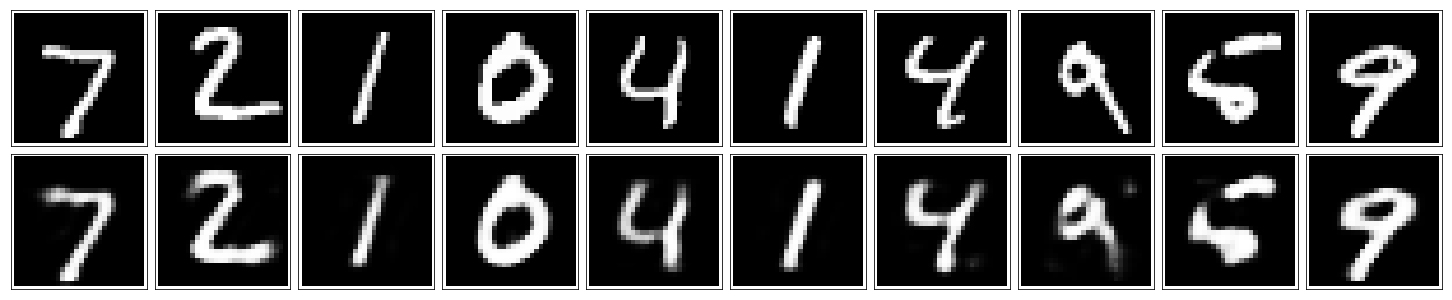

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.